# TESTE DE ESTACIONARIDADE

# 0.0 Importações

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.tsa.stattools

from matplotlib.pylab import rcParams

sns.set()

In [2]:
rcParams['figure.figsize'] = 15, 6

# 1.0 Criação da Série

In [3]:
np.random.seed(10)
dados1 = np.random.normal(0, 1, 41)
dados1

array([ 1.3315865 ,  0.71527897, -1.54540029, -0.00838385,  0.62133597,
       -0.72008556,  0.26551159,  0.10854853,  0.00429143, -0.17460021,
        0.43302619,  1.20303737, -0.96506567,  1.02827408,  0.22863013,
        0.44513761, -1.13660221,  0.13513688,  1.484537  , -1.07980489,
       -1.97772828, -1.7433723 ,  0.26607016,  2.38496733,  1.12369125,
        1.67262221,  0.09914922,  1.39799638, -0.27124799,  0.61320418,
       -0.26731719, -0.54930901,  0.1327083 , -0.47614201,  1.30847308,
        0.19501328,  0.40020999, -0.33763234,  1.25647226, -0.7319695 ,
        0.66023155])

In [4]:
dados1 = pd.DataFrame(dados1)
dados1.head()

,0
0,1.331587
1,0.715279
2,-1.545400
3,-0.008384
4,0.621336


In [5]:
dados1.columns = ['valores']
dados1.head()

,valores
0,1.331587
1,0.715279
2,-1.545400
3,-0.008384
4,0.621336


In [6]:
indice = pd.date_range('1980', periods=len(dados1), freq='Y')
indice

DatetimeIndex(['1980-12-31', '1981-12-31', '1982-12-31', '1983-12-31',
               '1984-12-31', '1985-12-31', '1986-12-31', '1987-12-31',
               '1988-12-31', '1989-12-31', '1990-12-31', '1991-12-31',
               '1992-12-31', '1993-12-31', '1994-12-31', '1995-12-31',
               '1996-12-31', '1997-12-31', '1998-12-31', '1999-12-31',
               '2000-12-31', '2001-12-31', '2002-12-31', '2003-12-31',
               '2004-12-31', '2005-12-31', '2006-12-31', '2007-12-31',
               '2008-12-31', '2009-12-31', '2010-12-31', '2011-12-31',
               '2012-12-31', '2013-12-31', '2014-12-31', '2015-12-31',
               '2016-12-31', '2017-12-31', '2018-12-31', '2019-12-31',
               '2020-12-31'],
              dtype='datetime64[ns]', freq='A-DEC')

In [7]:
serie1 = pd.Series(dados1['valores'].values, index=indice)

<AxesSubplot:>

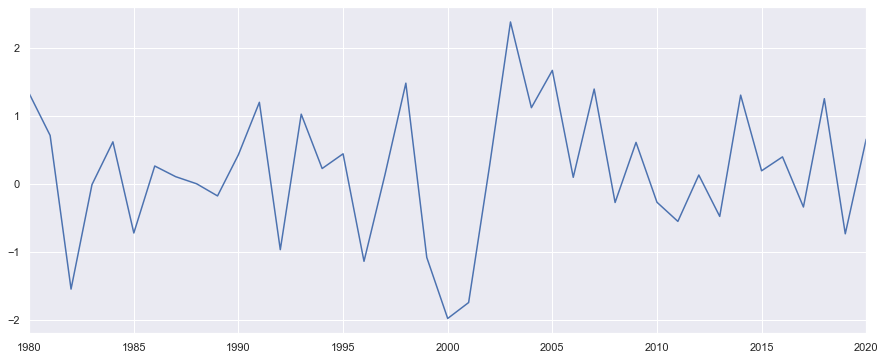

In [8]:
serie1.plot()

# 2.0 Teste de Estacionaridade

Teste KPSS (Kwiatkowski – Phillips – Schmidt – Shin

- Ho = não é estacionário: estatística do teste > valor crítico;
- Ha = é estacionário: estatística do teste < valor crítico.

In [12]:
kpss = statsmodels.tsa.stattools.kpss(serie1)
print('Estatística do teste: {:.4f}'.format(kpss[0]))
print('p-valor: {:.4f}'.format(kpss[1]))
print('Número de lags: {}'.format(kpss[2]))
print('Valores Críticos:')

for chave, valor in kpss[3].items():
    print('{}: {:.4f}'.format(chave, valor))
    

Estatística do teste: 0.1918
p-valor: 0.1000
Número de lags: 10
Valores Críticos:
10%: 0.3470
5%: 0.4630
2.5%: 0.5740
1%: 0.7390


C:\Users\herna\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


Teste DF (Dickey Fuller)

- Ho = não é estacionário: estatística do teste > valor crítico;
- Ha = é estacionário: estatística do teste < valor crítico.

In [14]:
df = statsmodels.tsa.stattools.adfuller(serie1)
print('Estatística do teste: {:.4f}'.format(df[0]))
print('p-valor: {:.8f}'.format(df[1]))
print('Valores Críticos:')

for chave, valor in df[4].items():
    print('{}: {:.4f}'.format(chave, valor))

Estatística do teste: -5.8642
p-valor: 0.00000034
Valores Críticos:
1%: -3.6056
5%: -2.9371
10%: -2.6070
